# Property price evolution model for Limerick (Ireland)

## Introduction

House pricing has raised in the recent years in Ireland. Buying a house is one of the main lifelong investments families will face off. There are several Real Estate blogs that are giving their forecast opinion through blogs.

This model aims to give answers to this question by runing a model based in different variables explained below.
The model is fed with data collected from [Central Statistics Office](https://www.cso.ie/en/index.html) (CSO) and media with an area of interest in County Limerick.

Since is a requirement to have larger amount of data (at least 100 entires), different numpy.random functions have been implemented to generate larger data over the existing ones. 

## Methodology

In order to define the variables that will define the property price, several datasets have been chosen as suitable
and potentially important when it comes to define property price. Some of the dataset ahd enough information to be used in the model while others needed further work to get enough data assuming by regression prediction (Population growth).

Datasets collected from CSO look as below:

In [44]:
#import pandas and read datasets
import pandas as pd
path = (r'EDA57.20201230T121257.csv')## Total classes in national school (source: CSO)
nsf = pd.read_csv (path)
print('Number of schools: ',nsf.keys())
path = (r'IIA01.20201230T121251.csv')## income data (source: CSO)
inf = pd.read_csv (path)
print('income information: ',inf.keys())
path = (r'MUM01.20201230T121228.csv')## unemployement- data (source: CSO)
uf = pd.read_csv (path)
print('Unemployement',uf.keys())

Number of schools:  Index(['Statistic', 'Year', 'County', 'School Programme', 'UNIT', 'VALUE'], dtype='object')
income information:  Index(['Statistic', 'Year', 'Electoral Division', 'UNIT', 'VALUE'], dtype='object')
Unemployement Index(['Statistic', 'Month', 'Age Group', 'Sex', 'UNIT', 'VALUE'], dtype='object')


In order to explore each of those and how it looks the information, it has been broken down each one in order to study their values and its distribution.

### Datasets

#### Dataset 1: Number of Schools

Visualization, clean up and select the values interested for our model is required as first instance beforehand.

In [45]:
import seaborn as sns
from matplotlib import pyplot as plt
# reindex the columns just to avoid spaces in the header names
p = nsf.reindex(columns=['Statistic', 'Year', 'County', 'School Programme', 'UNIT', 'VALUE'])
# dataframe just selecting information wanted to select
df1 = p[['Statistic','Year','County','VALUE']]
df1 = df1.loc[df1['Statistic'].str.startswith('Cla')] # Select just the classes


Select Limerick county and sum the values per year:

In [46]:
import numpy as np
## select just Limerick numbers (Limerick, Limerick city and Limerick county)
select_Limerick = df1.loc[df1['County'].str.startswith('Lim')]
## group by Year and sum value
schools_Limerick=select_Limerick.groupby('Year', as_index=False).agg({"VALUE": "sum"})



In order to see the pattern followed by the data, a plot has been generated with its regression line to see the trend of the number of schools in the county:

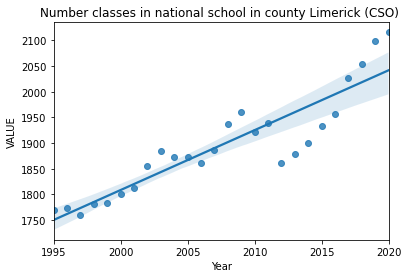

In [47]:
## Plot the distribution and the trend of number of classes in national school in County Limerick
import seaborn as sns
from matplotlib import pyplot as plt
sns.regplot(x="Year", y="VALUE", data=schools_Limerick).set_title('Number classes in national school in county Limerick (CSO) ');


since it has been requested at least 100 entries, it has been chosen [numpy.random.randint](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html) to create missing data and add it to the correspondent dataset.

In [48]:
# Create two arrays, the idea is to simulate data from 1900 to the year before it has been collected the data from CSO
import numpy as np
new_Years = np.linspace(1900,1994,94,1,dtype=int)
new_Value = np.random.randint(1400, 1750, 94, dtype='l')## set random low, high


In [49]:
# Create a dataset with the new data
row= pd.DataFrame({"Year" : new_Years , "VALUE" : new_Value})

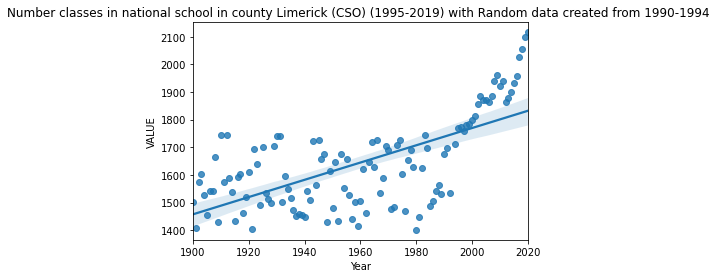

In [50]:
# Concatenate data to the one from CSO and plot it
frames = [row,schools_Limerick]
schools_Limerick_concat = pd.concat(frames)
sns.regplot(x="Year", y="VALUE", data=schools_Limerick_concat ).set_title('Number classes in national school in county Limerick (CSO) (1995-2019) with Random data created from 1990-1994 ');

#### Population growth

For Population Growth the data has been obtained from a publication of Limerick.ie (3). Since the data was discontinued, in order to have data for blank years, a linear regression model has been set up to obtain data for the years used to further feed the model (4)

In [51]:
PopGrowth = pd.DataFrame(columns=["year", "Inhabitants"], data=[[1996,165042],[2002,175304],[2006,184055],[2011,191809],[2016,194899]]) ## CSO and 


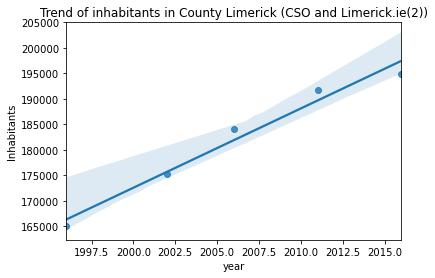

In [52]:
## Plot data from CSO
sns.regplot(x="year", y="Inhabitants", data=PopGrowth).set_title('Trend of inhabitants in County Limerick (CSO and Limerick.ie(2))');

since it has been requested at least 100 entries, it has been chosen numpy.random.randint to create missing data. For population growth first it has been generated a regression line using [sklearn's linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to fill the blanks of the interval. After that it has been applied the same methodology for new schools to genereate random data and add it to the dataset, in this case, it has been used [numpy.random.triangular](https://numpy.org/doc/stable/reference/random/generated/numpy.random.triangular.html)

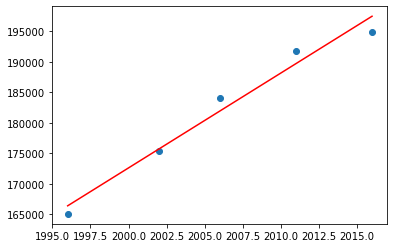

In [53]:
## calculate the regression line
from sklearn.linear_model import LinearRegression

X = pd.DataFrame(PopGrowth['year'].values.reshape(-1, 1)) # values converts it into a numpy array
y = pd.DataFrame(PopGrowth['Inhabitants'].values.reshape(-1, 1)) # -1 means that calculate the dimension of rows, but have 1 column
reg = LinearRegression().fit(X, y)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, y)
plt.plot(X, Y_pred, color='red')
plt.show()

Calculate the values between 2013-2018 (This is the iterval I will use to fit the further model)

In [54]:
X_new = np.array([2013, 2014, 2015, 2016, 2017, 2018]).reshape(-1, 1)
print(linear_regressor.predict(X_new))


[[192788.26578073]
 [194342.15780731]
 [195896.04983389]
 [197449.94186046]
 [199003.83388704]
 [200557.72591362]]


In [55]:
## Create a new population growth dataset with new data obtained from regression model
new_pop_growth = pd.DataFrame(columns=["year", "Inhabitants"], data=[[2013,192788],[2014,194342],[2015,195896],[2016,197450],[2017,199004],[2018,200558]])
print(new_pop_growth)

   year  Inhabitants
0  2013       192788
1  2014       194342
2  2015       195896
3  2016       197450
4  2017       199004
5  2018       200558


Add entries


In [56]:
### Add entries using random.numpy.triangular function
import numpy as np
new_Years_pop = np.linspace(1900,2012,112,1,dtype=int)
new_Value_pop = np.random.triangular(150000, 192788, 192788, 112)## set random low, high


Concatenate dataframe

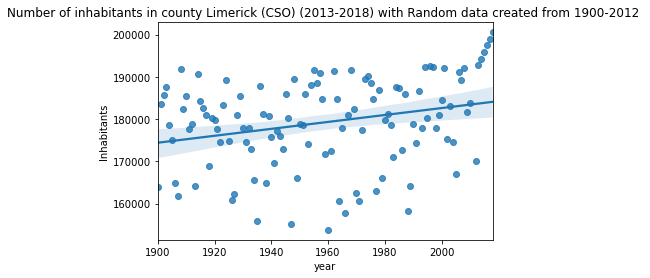

In [57]:
row_Pop_growth= pd.DataFrame({"year" : new_Years_pop , "Inhabitants" : new_Value_pop})
frames = [row_Pop_growth,new_pop_growth]
new_pop_growth = pd.concat(frames)
sns.regplot(x="year", y="Inhabitants", data=new_pop_growth).set_title('Number of inhabitants in county Limerick (CSO) (2013-2018) with Random data created from 1900-2012 ');
##print(new_pop_growth)

#### Unemployement

The unemployement rate has been obtained from Limerick.ie (5). Again, as above, randomly data generated using [numpy.random.uniform](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html)

In [58]:

unempl = pd.DataFrame(columns=["year", "Unemployement rate"], data=[[2012,15.8],[2013,14.4],[2014,12.7],[2015,10.5],[2016,8.8],[2017,7.1],[2018,5.2]])


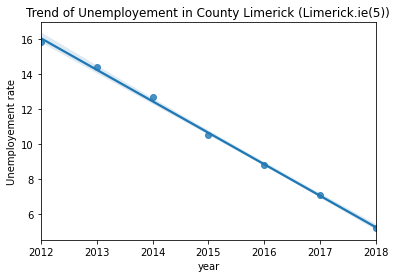

In [59]:
sns.regplot(x="year", y="Unemployement rate", data=unempl).set_title('Trend of Unemployement in County Limerick (Limerick.ie(5))');

Add entries with random function

In [60]:
### Add entries using random.numpy.uniform function
import numpy as np

new_Years_unempl = np.linspace(1900,2011,111,1,dtype=int)

new_Value_unempl = np.random.uniform(10,30, size=(111))

Concatenate data

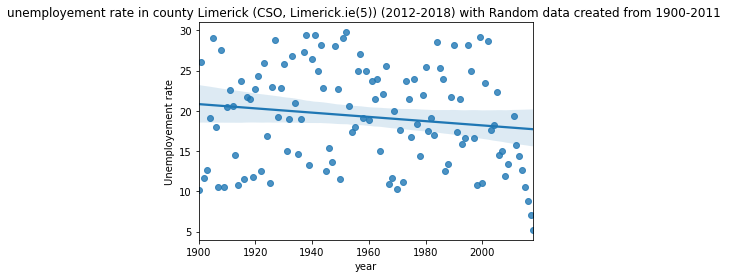

In [61]:
row_unempl= pd.DataFrame({"year" : new_Years_unempl , "Unemployement rate" : new_Value_unempl})
frames = [unempl,row_unempl]
new_unempl = pd.concat(frames)
sns.regplot(x="year", y="Unemployement rate", data=new_unempl).set_title('unemployement rate in county Limerick (CSO, Limerick.ie(5)) (2012-2018) with Random data created from 1900-2011 ');
##print(new_pop_growth)

#### Investment per year

The investment data has been captured from Limerick.ie (6). Again the methodology used is the same. In this case, since the data doesn't come from CSO, the dataset has initially been generated manually. Then, it has been used [numpy.random.uniform](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) to randomly generate the data to 1900.

In [62]:

invest = pd.DataFrame(columns=["year", "Investment"], data=[[2013,596.0],[2014,80],[2015,569.6],[2016,84.5],[2017,353.7],[2018,346.6]])

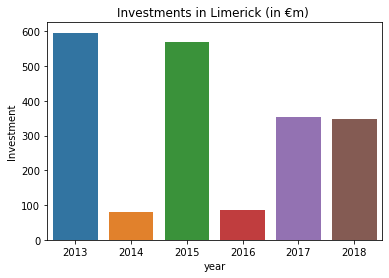

In [63]:
sns.barplot(x="year", y="Investment", data=invest).set_title('Investments in Limerick (in €m) ');

Add entires with random function

In [64]:
### Add entries using random.numpy.uniform function
import numpy as np

new_Years_inv = np.linspace(1900,2012,112,1,dtype=int)

new_Value_inv = np.random.uniform(40,200, size=(112))


concatenate data

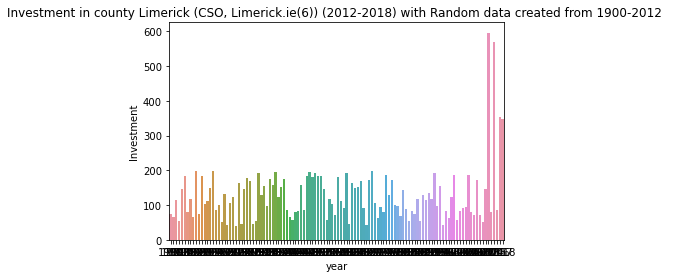

In [65]:
row_inv= pd.DataFrame({"year" : new_Years_inv , "Investment" : new_Value_inv})
frames = [invest,row_inv]
new_inv = pd.concat(frames)
sns.barplot(x="year", y="Investment", data=new_inv).set_title('Investment in county Limerick (CSO, Limerick.ie(6)) (2012-2018) with Random data created from 1900-2012 ');

#### New jobs

the new jobs data comes again from Limerick.ie (6), to generate the random data, it has been used [numpy.random.radint](https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.random.randint.html)

In [66]:
njobs = pd.DataFrame(columns=["year", "New Jobs"], data=[[2013,2614],[2014,1300],[2015,3523],[2016,1957],[2017,3326],[2018,1651]])

Text(0.5, 1.0, 'New jobs created in Limerick (2013-2018) (limerick.ie(6))')

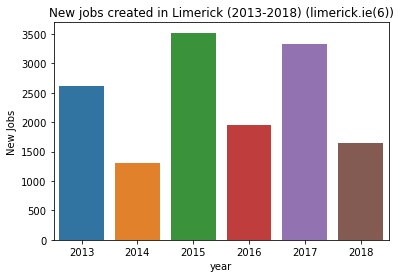

In [67]:
sns.barplot(x="year", y="New Jobs", data=njobs).set_title('New jobs created in Limerick (2013-2018) (limerick.ie(6))')

Add entries

In [68]:
### Add entries using random.numpy.uniform function
import numpy as np

new_Years_njobs = np.linspace(1900,2012,112,1,dtype=int)

new_Value_njobs = np.random.randint(500,2000, size=(112))


Concatenate

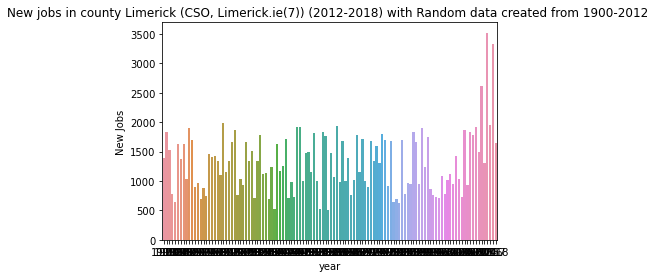

In [69]:
row_njobs= pd.DataFrame({"year" : new_Years_njobs , "New Jobs" : new_Value_njobs})
frames = [njobs,row_njobs]
new_njobs = pd.concat(frames)
sns.barplot(x="year", y="New Jobs", data=new_njobs).set_title('New jobs in county Limerick (CSO, Limerick.ie(7)) (2012-2018) with Random data created from 1900-2012 ');

#### Housing Price 

Housing price has been obtained from CSO (1). Methodology followed to generate the rest of the data is as above in other cases. The random data has been generated using [numpy.random.randint](https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.random.randint.html)

In [70]:
path = (r'HPA02.20210101T190157.csv') ## Source CSO
hp = pd.read_csv (path)
print('housing price',hp.keys())

housing price Index(['Statistic', 'Year', 'County', 'Dwelling Status', 'Stamp Duty Event',
       'Type of Buyer', 'Type of Sale', 'UNIT', 'VALUE'],
      dtype='object')


Select the prices registered for County Limerick

In [71]:
## select just Limerick numbers (Limerick, Limerick city and Limerick county)
select_Limerick = hp.loc[hp['County'].str.startswith('Lim')]
## group by Year and sum value
house_Limerick=select_Limerick.groupby('Year', as_index=False).agg({"VALUE": "mean"})


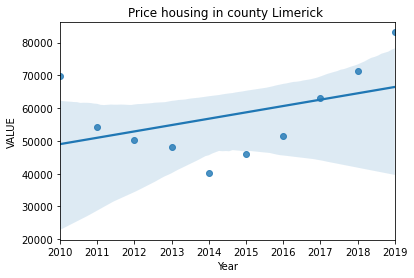

In [72]:
sns.regplot(x="Year", y="VALUE", data=house_Limerick).set_title('Price housing in county Limerick ');

Add entries

In [73]:
### Add entries using random.numpy.uniform function
import numpy as np

new_Years_housing = np.linspace(1900,2009,109,1,dtype=int)

new_Value_housing = np.random.randint(20000,60000, size=(109))

Concatenate values

In [74]:
row_housing= pd.DataFrame({"Year" : new_Years_housing , "VALUE" : new_Value_housing})

frames = [house_Limerick,row_housing]
new_housing = pd.concat(frames)

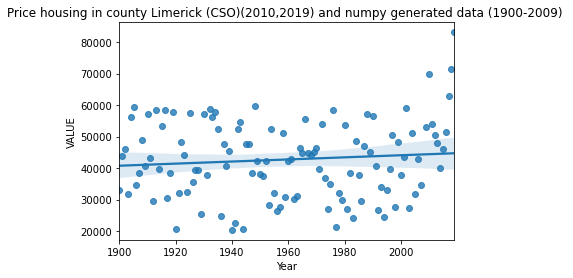

In [75]:
sns.regplot(x="Year", y="VALUE", data=new_housing).set_title('Price housing in county Limerick (CSO)(2010,2019) and numpy generated data (1900-2009) ');

## Create a unique dataframe merging the information from the ones created above

In [76]:
new = [new_housing["Year"], new_housing["VALUE"]]
headers = ["year", "Property price"]

In [77]:
df4 = pd.concat(new, axis=1, keys=headers)
print(df4)

     year  Property price
0    2010    69878.280374
1    2011    54093.519302
2    2012    50380.690278
3    2013    48068.300935
4    2014    40076.655841
..    ...             ...
104  2004    51305.000000
105  2005    31753.000000
106  2006    42849.000000
107  2007    34712.000000
108  2009    53010.000000

[119 rows x 2 columns]


In [78]:
new_new=pd.merge(df4, new_njobs, on='year')
merge_invest= pd.merge(new_new,new_inv, on='year')
merge_unempl = pd.merge(merge_invest,new_unempl, on='year')
schools = schools_Limerick_concat.rename(columns={'Year': 'year', 'VALUE': 'New Schools'})
merge_schools= pd.merge(merge_unempl, schools, on='year')
merge_Pop_growth= pd.merge(merge_schools, new_pop_growth, on='year')


## Result Dataset

By capturing relevant information from the other datasets, a new dataset has been created. 

In [79]:
# In case I did a mistake, remove duplicate rows
merge_Pop_growth_=merge_Pop_growth.drop_duplicates()
## display all the dataset
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(merge_Pop_growth)

     year  Property price  New Jobs  Investment  Unemployement rate  \
0    2012    50380.690278      1494  145.672902           15.800000   
1    2013    48068.300935      2614  596.000000           14.400000   
2    2014    40076.655841      1300   80.000000           12.700000   
3    2015    45928.559579      3523  569.600000           10.500000   
4    2016    51480.507639      1957   84.500000            8.800000   
5    2017    62999.727103      3326  353.700000            7.100000   
6    2018    71376.795093      1651  346.600000            5.200000   
7    1900    33004.000000      1400   72.943422           10.222501   
8    1901    43829.000000      1831   66.729805           26.047319   
9    1902    46093.000000      1526  114.800750           11.625528   
10   1903    31681.000000       786   54.544950           12.607078   
11   1904    56159.000000       646  145.603113           19.054575   
12   1905    59385.000000      1629  183.225676           29.025368   
13   1

[Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) has been generated to see the distribution of each of the variables of the dataset, even though it seems each variable it's well self-explained. This is a good option to see

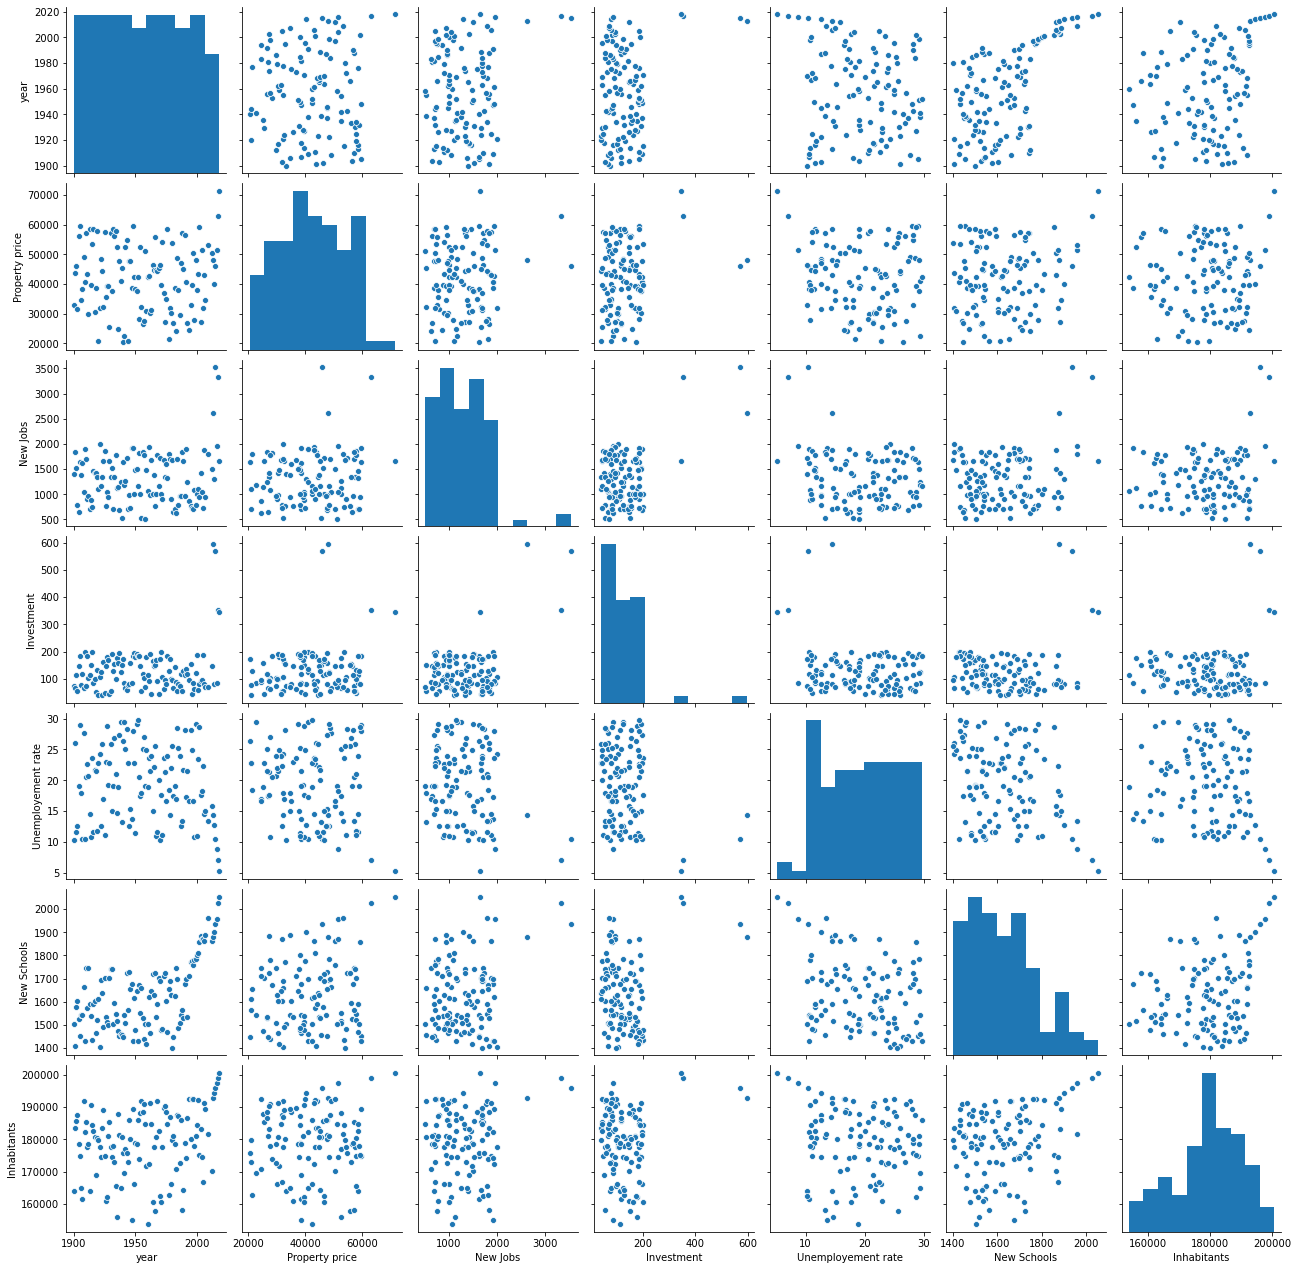

In [80]:
sns.pairplot(merge_Pop_growth)


## Prediction model

The kind of predition we are facing is a regression problem since the aim is to predict a continuous-valued attribute associated with an object, in this case to obtain property price for the next years in Limerick. to predict the model, it has been generated a model to predict the property price by asking the user to introduce 6 variables. It has been used [Sklearn LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [81]:
inputs= merge_Pop_growth[['year','New Jobs','Investment','Unemployement rate','New Schools','Inhabitants']]
outputs = merge_Pop_growth[['Property price']]

In [82]:
## https://datatofish.com/multiple-linear-regression-python/
from sklearn import linear_model
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(inputs, outputs)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)



Intercept: 
 [114218.58553263]
Coefficients: 
 [[-4.77789627e+01  5.88551947e-01  2.15255524e+01 -1.02231874e+02
   1.45511690e+01 -2.13910355e-02]]


First let's try to test the model with an existing values to see if it's performing good. Expecting some value somehow close enough to the value entered by hand

In [83]:
# prediction with sklearn
year = 2016
new_jobs = 1957
new_investment = 84.5
New_Unemployment_Rate = 8.8
New_Schools = 1956.0
New_inhabitants = 197450
print ('Predicted Stock Index Price: \n', regr.predict([[year ,new_jobs, new_investment, New_Unemployment_Rate, New_Schools, New_inhabitants]]))



Predicted Stock Index Price: 
 [[44205.68822054]]


As we can see the result is not too far from 2016 data entered

Now introduce yourself the desired values you want to try:

In [85]:
year = int(input("Year :"))
new_jobs = int(input("New Jobs : "))
new_investment = float(input("Investment in €m : "))
New_Unemployment_Rate = float(input("Unemployment rate : "))
New_Schools = int(input("Number classes in national school :"))
New_inhabitants = int(input("New inhabitants :"))
print ('Predicted Stock Index Price: \n', regr.predict([[year ,new_jobs, new_investment, New_Unemployment_Rate, New_Schools, New_inhabitants]]))

Year :2025
New Jobs : 200
Investment in €m : 300
Unemployment rate : 4.5
Number classes in national school :2000
New inhabitants :204000
Predicted Stock Index Price: 
 [[48320.08554503]]


## References

(1) Central Statistics Office : (https://www.cso.ie/en/index.html)

(2) Limerick.ie : https://www.limerick.ie/sites/default/files/media/documents/2018-07/Economic%20Profiling%20Report%20for%20Limerick%20City%20and%20County.pdf


(3) Limerick.ie (Population Growth) : https://www.limerick.ie/business/growing-limerick/facts-and-figures/limericks-recent-economic-growth

(4) Towards data Science : (Linear regression) https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d

(5) Limerick.ie (Unemployement rate) https://www.limerick.ie/business/growing-limerick/facts-and-figures/limericks-recent-economic-growth#:~:text=The%20CSO's%20Labour%20Force%20Survey,of%205.7%25%20in%20Q1%202018.

(6) Limerick.ie (investment): https://www.limerick.ie/business/growing-limerick/facts-and-figures/limericks-recent-economic-growth#:~:text=The%20CSO's%20Labour%20Force%20Survey,of%205.7%25%20in%20Q1%20